In [164]:
import numpy as np
import pandas as pd
import sys

import seaborn as sns
import matplotlib.pylab as plt

from scipy.stats import chi2_contingency

In [165]:
np.random.seed(2323)

In [177]:
a = np.random.binomial(1, 0.21, 8908).astype("bool")
b = np.random.binomial(1, 0.2, 6976).astype("bool")

In [178]:
df = pd.DataFrame(np.hstack([a, b]), columns=['Conversion'])
df.loc[:len(a),'Test'] = 'A'
df.loc[len(a):, 'Test'] = 'B'
frequency_table = pd.crosstab(df.Conversion, df.Test, margins=True)
frequency_table

Test,A,B,All
Conversion,,,
False,7019,5543,12562
True,1889,1433,3322
All,8908,6976,15884


In [179]:
print(f' Conversion Rate A Test {a.mean():.2%}')
print(f' Conversion Rate B Test {b.mean():.2%}')
print(f' Conversion Rate Difference {a.mean() - b.mean():.2%}')

 Conversion Rate A Test 21.21%
 Conversion Rate B Test 20.54%
 Conversion Rate Difference 0.66%


In [180]:
def permutation(a, b):
    ab = np.concatenate([a, b])
    np.random.shuffle(ab)
    new_a = ab[:len(a)]
    new_b = ab[len(a):]
    assert(len(a)==len(new_a))
    delta = np.square(new_a.mean() - new_b.mean())
    return delta

In [181]:
def test(a, b, n_samples=1000):
    rng = range(n_samples)
    samples = np.fromiter(
        map(lambda x: permutation(
            a, b), rng), dtype=np.float)
    prob_A = a.mean()
    prob_B = b.mean()
    delta = np.square(prob_A - prob_B)
    p_val = (samples >= delta).mean()
    return p_val, samples       

In [182]:
p_val, samples = test(a, b, n_samples=10000)
print(f'P-Value = {p_val:.2%}')

P-Value = 32.06%


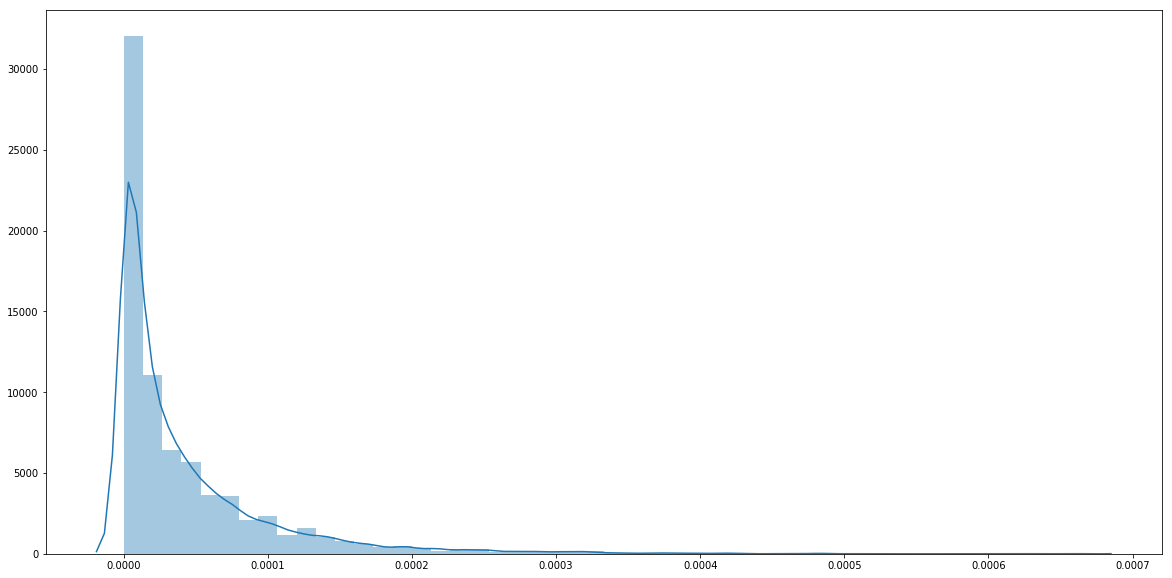

In [183]:
f, ax = plt.subplots(figsize=(20,10))
sns.distplot(samples, ax=ax)

In [184]:
obs = np.array([[a.sum(), b.sum()],[(~a).sum(), (~b).sum()]])

In [185]:
obs

array([[1889, 1433],
       [7019, 5543]])

In [186]:
chi2, p, dof, ex = chi2_contingency(obs, correction=False)

In [187]:
print(f'P-Value = {p:.2%}')

P-Value = 30.73%


In [188]:
a = np.random.binomial(1, 0.12, 8908).astype("bool")
b = np.random.binomial(1, 0.1, 6976).astype("bool")
p_val, samples = test(a, b, n_samples=1000)
print(f'P-Value = {p_val:.2%}')

P-Value = 0.00%
